In [1]:
# Basic Tutorial: Reeb graph class

In [1]:
from cereeberus import ReebGraph

In [4]:
import networkx as nx
import cereeberus.data.graphs as graph_ex
import matplotlib.pyplot as plt
import cereeberus.compute.draw as draw



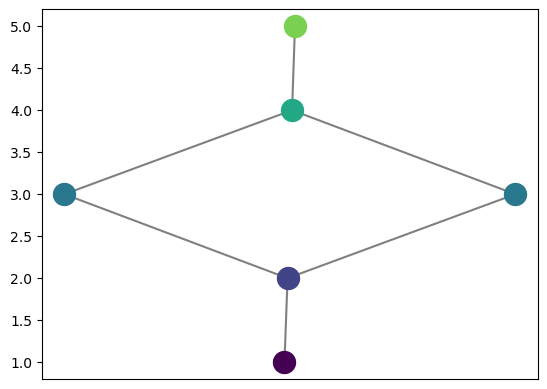

In [6]:
# Version with an example graph 
H = graph_ex.torus_graph()
G = ReebGraph(H, seed = 48864)

G.draw()

## Liz making examples, delete eventually

In [49]:
class Reeb(nx.MultiGraph):
    """Class for Reeb Graph.

    Attributes:
        G (nx.Graph): Optional. If nothing passed on initialization, defaults to None.
        fx (dict): The function values associated with G stored as a dictionary.
        pos (dict): Standard spring layout locations for the nodes.
        pos_f (dict): Positions for nodes given by (spring layout location, function value).

    Methods:
        __init__(self, G=None, f={}, verbose=False):
            Initializes a Reeb graph object.
        
        add_vertex(self, vertex, f_vertex):
            Add a vertex to the Reeb graph. Note that edges can be added using the standard networkx add_edge method.
        
        set_pos_from_f(self, verbose=False):
            Set the position of the nodes based on the function values. The result will be the (spring layout x, function value y). Note that this will overwrite the previous positions.
        
        draw(self, ax=None, **kwargs):
            A drawing of the Reeb graph.
        
        draw_straight_line(self, ax=None, **kwargs):
            A straight line drawing of the Reeb graph. Very simple, but if you have multi-edges, they won't show up.
    """

    def __init__(self, G=None, f={}, seed = None, verbose=False):
        """Initializes a Reeb graph object.

        Parameters:
            G (nx.Graph): Optional. If not None, a graph to initialize the Reeb graph with.
            f (dict): Optional. If not an empty dictionary, a dictionary of function values associated with the graph nodes.
            seed (int): Optional. If not None, a seed to pass to the spring layout.
            verbose (bool): Optional. If True, will print out additional information during initialization.
        """
        super().__init__()

        if G is not None:
            super().add_nodes_from(G.nodes)
            super().add_edges_from(G.edges)
            self.f = nx.get_node_attributes(G, 'f')

        if G is None:
            self.f = {}
        elif f != {}:
            self.f = f
        else:
            self.f = nx.get_node_attributes(G, 'fx')

        self.set_pos_from_f(seed = seed, verbose=verbose)

    def add_vertex(self, vertex, f_vertex):
        """Add a vertex to the Reeb graph. Note that edges can be added using the standard networkx add_edge method.

        Parameters:
            vertex (int): The vertex to add.
            f_vertex (float): The function value of the vertex.
        """
        super().add_node(vertex)
        self.f[vertex] = f_vertex

    def set_pos_from_f(self, seed = None, verbose=False):
        """Set the position of the nodes based on the function values. The result will be the (spring layout x, function value y). Note that this will overwrite the previous positions.

        Parameters:
            verbose (bool): Optional. If True, will print out the function values and the positions.
        """
        if len(self.nodes) == 0:
            if verbose:
                print('Nothing to be done, no nodes here')
            self.pos = {}
            self.pos_f = {}
        else:
            pos = nx.spring_layout(self, seed = seed)
            self.pos = pos

            self.pos_f = {}

            for v in self.nodes:
                self.pos_f[v] = (self.pos[v][0], self.f[v])

            if verbose:
                print('Function values:', self.f)
                print('Positions:', self.pos_f)

    def draw(self):
        """
        A drawing of the Reeb graph. Uses the fancy version from cereeberus.compute.draw.

        Parameters:
            None
        
        Returns:
            None
        """

        # TODO: What does cpx and cpy do and do we want to pass them as options?
        draw.reeb_plot(self, pos=self.pos_f, cpx=.1, cpy=.1)


    def draw_straight_line(self, ax=None, **kwargs):
        """
        A straight line drawing of the Reeb graph. Very simple, but if you have multi-edges, they won't show up.

        Parameters:
            ax (matplotlib axis): Optional. If not passed, will create a new figure and axis.
            **kwargs: Additional keyword arguments to pass to the draw.
        
        Returns:
            ax (matplotlib axis): The matplotlib axis object used for the drawing.
        """
        if ax is None:
            fig, ax = plt.subplots()

        nx.draw(self, pos=self.pos_f, **kwargs)
        plt.axis('on')
        ax.tick_params(left=True, labelleft=True)

        return ax


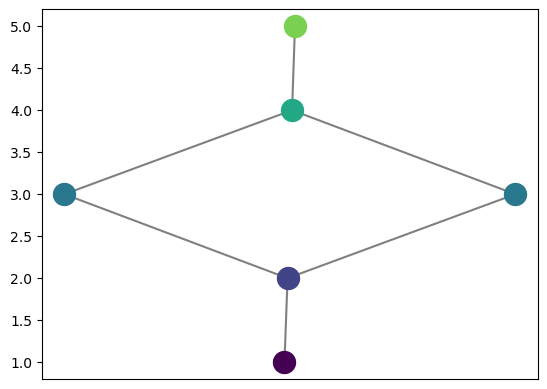

In [51]:
# Version with an example graph 
H = graph_ex.torus_graph()
G = Reeb(H, seed = 48864)

# G.set_pos_from_f()

G.pos_f

G.draw()

<Axes: >

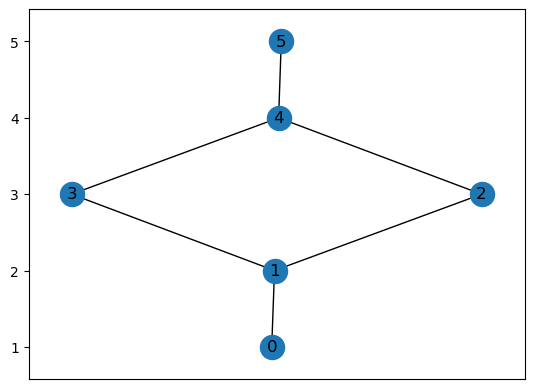

In [52]:
G.draw_straight_line(with_labels = True)

In [45]:
for v in G.neighbors(2):
    print(v)

1
4


In [46]:
G.adjacency()

In [25]:
# Version with an empty graph initialized

G = Reeb()

len(G.nodes)

0